In [ ]:
!pip install statistics
!pip install gensim
!pip install demoji
!pip install langid
!pip install nltk
#!!!!!! run this in cmd for some reason its not working here
!pip install imblearn #smote
!pip install bertopic transformers

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/587.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/587.4 kB ? eta -:--:--
    --------------------------------------- 10.2/587.4 kB ? eta -:--:--
   ---- ---------------------------------- 61.4/587.4 kB 656.4 kB/s eta 0:00:01
   --------------- ------------------------ 225.3/587.4 kB 1.7 MB/s eta 0:00:01
   ----------------------------- ---------- 430.1/587.4 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------  583.7/587.4 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 587.4/587.4 kB 2.5 MB/s eta 0:00:00
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7450 sha256=423153ac633edb1e80c2472c8a613dab50ce7da5cf7a8af0ae2b2ebf1b38d0df
  Stored in directory: c:\users\piotr\appdata\local\pip\cache\wheels\a7\30\34\fceae1c718a4e749dd51f479c5720c0671519887e824915

NameError: name 'nltk' is not defined

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Piotr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Piotr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Piotr\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Piotr\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Piotr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Piotr\AppData\Roaming\nltk_data...


True



VADER and BERTopic **lexicon**

logistic regression TF-IDF **supervised ML**


SOME ended up not being used but we're too sccared to remove some in casr the code stops working

In [9]:
import matplotlib.pyplot as plt
import langid  # A great package that allows to classify via language
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist  # For overall tokens frequency
from nltk.stem import WordNetLemmatizer  # Lemmatization
from nltk.sentiment import SentimentIntensityAnalyzer  # VADER
from gensim import corpora, models
import statistics
from collections import Counter
import pandas as pd
import demoji
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sentence_transformers import SentenceTransformer
import time
import numpy as np
from collections import defaultdict


In [ ]:
import os
os.getcwd()

'C:\\Users\\Piotr\\Desktop\\PYTHON JUPYTER NOTEBOOK\\sentiment\\sent'

In [2]:

df = pd.read_csv('df_40k.csv')

#display rows
df.head(10)

id  create_time              username region_code  \
0  7374061089564183854   1716907397             amy197963          us   
1  7376378807764258094   1717447031         christophnooz          us   
2  7378446534343478560   1717928464            good__guy_          pl   
3  7310404411371654430   1702086182            bridgetd_5          us   
4  7371265604092955950   1716256525              rtptalks          us   
5  7299063733484096811   1699445750     twin_emma_n_emily          us   
6  7382375713518701870   1718843295   scott_kerman_comedy          us   
7  7391373405548858667   1720938246  blueisthewarmercolor          us   
8  7377605801642429727   1717732723           darklevi002          us   
9  7307019958666415391   1701298174            bridgetd_5          us   

                                   video_description  like_count  \
0  Who’s ready for a deep dive into Project 2025?...        82.0   
1  #democrat #reagan #ronaldreagan #republican #d...       215.0   
2  Its hard to fall for such badly constructed Ii...       125.0   
3  Mark Romano #leftist #cult45 #biden #trumpisat...       923.0   
4  Kyle Rittenhouse is always wrong. #kylerittenh...       525.0   
5  Double the giggles, double the grins, double t...       135.0   
6  #joke #trump #funnyvideos #foryou #funnyvideo ...       558.0   
7  💙 Let’s see what Trump and his followers will ...        53.0   
8  #trump #politics #fyp #voteblue #donaldtrump #...       124.0   
9  coffeeytimesnews  #magaloser #biden2024 #trump...      1319.0   

   comment_count  share_count  view_count  \
0              0            2        1061   
1             12          144        2055   
2              5            0        1584   
3            224            4        3032   
4             46           11        3858   
5              8            2        1172   
6              0            3        9811   
7             23            1        1801   
8             18            3        1181   
9            200           40        5070   

                                       hashtag_names  \
0  ["greenscreen","momsoftiktok","biden2024","lib...   
1  ["truth","washington","ronaldreagan","biden202...   
2  ["biden2024","memes","alleyesonrafah","jewisht...   
3  ["biden2024","magaloser","jack","maga","cult45...   
4  ["biden2024","kylerittenhouse","kristinoem","m...   
5  ["identicaltwins","twin","twinsisters","biden2...   
6  ["funnyvideo","laughter","voteblue2024💙","dona...   
7  ["shooter","biden2024","together","fyppppppppp...   
8  ["news","biden2024","politics","fyp","maga","t...   
9  ["biden2024","magaloser","cult45","trumplost",...   

                                       voice_to_text  duration_type  \
0  Hey, so I'm gonna take a deep dive into Projec...              2   
1  Did you hear the story about the kid who was o...              2   
2                                                NaN              1   
3                                                NaN              1   
4  I don't know that I can think of anything more...              3   
5                                                NaN              2   
6  Donald Trump's biographer says Trump has sever...              1   
7                                                NaN              0   
8  Everyone of them knew the probability of dying...              3   
9                                                NaN              1   

   favorites_count  
0                0  
1                0  
2                0  
3                0  
4                0  
5                0  
6                0  
7                0  
8                0  
9                0

In [129]:
df['video_description'].iloc[1]

'#democrat #reagan #ronaldreagan #republican #dnc #trump #trump2024 #conviction #34 #washington #fjb #nyc #bronx #biden2024 #joebiden #election #truth #facts #votered #voteblue '

In [7]:
df['region_code'].value_counts()

region_code
us    30216
Name: count, dtype: int64

In [5]:
df = df[df['region_code'] == 'us']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30216 entries, 0 to 45869
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 30216 non-null  int64  
 1   create_time        30216 non-null  int64  
 2   username           30216 non-null  object 
 3   region_code        30216 non-null  object 
 4   video_description  30210 non-null  object 
 5   like_count         30216 non-null  float64
 6   comment_count      30216 non-null  int64  
 7   share_count        30216 non-null  int64  
 8   view_count         30216 non-null  int64  
 9   hashtag_names      30216 non-null  object 
 10  voice_to_text      12999 non-null  object 
 11  duration_type      30216 non-null  int64  
 12  favorites_count    30216 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 3.2+ MB


# missing values

# Video description

In [10]:
df[df['video_description'].isnull()]
#this is noise and trash

Empty DataFrame
Columns: [id, create_time, username, region_code, video_description, like_count, comment_count, share_count, view_count, hashtag_names, voice_to_text, duration_type, favorites_count]
Index: []

In [9]:
df = df.dropna(subset=['video_description'])


# Voice to text

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30210 entries, 0 to 45869
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 30210 non-null  int64  
 1   create_time        30210 non-null  int64  
 2   username           30210 non-null  object 
 3   region_code        30210 non-null  object 
 4   video_description  30210 non-null  object 
 5   like_count         30210 non-null  float64
 6   comment_count      30210 non-null  int64  
 7   share_count        30210 non-null  int64  
 8   view_count         30210 non-null  int64  
 9   hashtag_names      30210 non-null  object 
 10  voice_to_text      12998 non-null  object 
 11  duration_type      30210 non-null  int64  
 12  favorites_count    30210 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 3.2+ MB


**Voice to text is an optional but very informative feature**

We will not drop the rows with missing values as that would be just illogical, droping roughly 65% of the dataset.
Not to mention it doesn't indicate that the data is trash because it's just suplementary and video_description gives us text anyway

Let's fill the NULLs with a random word

In [12]:
df['voice_to_text'].fillna("IDDQD",inplace=True)

# why IDDQD?

because it's not a word in a dictionary and previous "not available" was crushed by stopwords so

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30210 entries, 0 to 45869
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 30210 non-null  int64  
 1   create_time        30210 non-null  int64  
 2   username           30210 non-null  object 
 3   region_code        30210 non-null  object 
 4   video_description  30210 non-null  object 
 5   like_count         30210 non-null  float64
 6   comment_count      30210 non-null  int64  
 7   share_count        30210 non-null  int64  
 8   view_count         30210 non-null  int64  
 9   hashtag_names      30210 non-null  object 
 10  voice_to_text      30210 non-null  object 
 11  duration_type      30210 non-null  int64  
 12  favorites_count    30210 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 3.2+ MB


# Duplicates?


In [14]:
#lets check if there are any duplicates
len(pd.unique(df['id']))

29345

In [17]:
#see where they are
df[df['id'].duplicated(keep=False)].index

Index([], dtype='int64')

In [ ]:
#...and what they are
#df.loc[[1415, 2575, 11068, 13389]]


id  create_time        username region_code  \
1415   7394044772903636270   1721560227    danielxprado          us   
2575   7373163783730236718   1716698477       ibb.queen          us   
11068  7433800187732299054   1730816492  latanya_sharay          us   
13389  7433924932494462239   1730845540     tess.caseyy          us   

                                       video_description  like_count  \
1415   #DonaldTrumpNews #JoeBidenNews #PTiktok Copy D...        81.0   
2575   Harvard University    #usa #usa_tiktok #usarmy...       361.0   
11068  Dancing To Victory for the 2024 Presidential E...        99.0   
13389  gotta enjoy our freedom while we still can #gi...       421.0   

       comment_count  share_count  view_count  \
1415              30            1        2175   
2575              29           22        2167   
11068              2            1        1057   
13389              5           96       12029   

                                           hashtag_names  \
1415   ["old","29","30","joebidennews","32","seniors"...   
2575   ["محمد_رمضان","nutrition","france","babiesofti...   
11068                    ["vote","kamala","electionday"]   
13389  ["babu","perfectday","harris","kamalaharris202...   

                                           voice_to_text  duration_type  \
1415   Good morning, TikTok. Come and join me on the ...              2   
2575                                               IDDQD              2   
11068                                              IDDQD              2   
13389                        Do you wanna go grab coffee              1   

       favorites_count  
1415                 0  
2575                 0  
11068                0  
13389                0

In [16]:
df = df.drop_duplicates(subset=['id'])

# all fine?

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29345 entries, 0 to 45869
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 29345 non-null  int64  
 1   create_time        29345 non-null  int64  
 2   username           29345 non-null  object 
 3   region_code        29345 non-null  object 
 4   video_description  29345 non-null  object 
 5   like_count         29345 non-null  float64
 6   comment_count      29345 non-null  int64  
 7   share_count        29345 non-null  int64  
 8   view_count         29345 non-null  int64  
 9   hashtag_names      29345 non-null  object 
 10  voice_to_text      29345 non-null  object 
 11  duration_type      29345 non-null  int64  
 12  favorites_count    29345 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 3.1+ MB


# Different languages

In [19]:
df[['region_code','video_description']].head(15)
#whoopsies, there's non-english!
#our misatke, we wanted to present more than us and it backfired

region_code                                  video_description
0           us  Who’s ready for a deep dive into Project 2025?...
1           us  #democrat #reagan #ronaldreagan #republican #d...
3           us  Mark Romano #leftist #cult45 #biden #trumpisat...
4           us  Kyle Rittenhouse is always wrong. #kylerittenh...
5           us  Double the giggles, double the grins, double t...
6           us  #joke #trump #funnyvideos #foryou #funnyvideo ...
7           us  💙 Let’s see what Trump and his followers will ...
8           us  #trump #politics #fyp #voteblue #donaldtrump #...
9           us  coffeeytimesnews  #magaloser #biden2024 #trump...
10          us  #vawalawyer #biden #biden2024 #undocumented #i...
11          us  #andybeshear #greenscreen #genz #vote #democra...
12          us  Chris Christie just ENDED Vivek Ramaswamy’s ca...
13          us  #capcut #capcutmeme #biden #trump #joebiden #d...
14          us  Hunter Biden challenges Republicans to hold a ...
15          us  Our congress working hard for AIPAC. pause and...

In [20]:
#let's save it so we can compare it later how much of the dataset we lost
first_dataset=df.shape[0]

In [21]:
df_check1 = df.copy() #a clean copy, processing done
df_check2=df.copy()   #minor regex, just getting rid of hashes and emojis
df_check3= df.copy()  #hashes, emojis, special signs, numbers, line breaks, single characters

# While we are only checking video_description, we will already apply regex to all text based columns

In [22]:
#remove hash and emojis (CHAT GPT HELPED WITH LAMBDA and this goddamn demoji)
#emojis (CHAT GPT)


demoji.download_codes()  # This downloads the emoji database

# Function to remove emojis
def remove_emojis(text):
    return demoji.replace(text, "")
#hashes
df_check2[['video_description', 'hashtag_names', 'voice_to_text']] = df_check3[['video_description', 'hashtag_names', 'voice_to_text']].apply(
    lambda col: col.str.replace(r'#', ' ', regex=True)
)
#emojis
df_check2[['video_description', 'hashtag_names', 'voice_to_text']] = df_check2[['video_description', 'hashtag_names', 'voice_to_text']].apply(
    lambda col: col.apply(lambda x: remove_emojis(x) if isinstance(x, str) else x)
)

In [23]:

#remove everything


#hashes
df_check3[['video_description', 'hashtag_names', 'voice_to_text']] = df_check3[['video_description', 'hashtag_names', 'voice_to_text']].apply(
    lambda col: col.str.replace(r'#', ' ', regex=True)
)

#emoji
df_check3[['video_description', 'hashtag_names', 'voice_to_text']] = df_check3[['video_description', 'hashtag_names', 'voice_to_text']].apply(
    lambda col: col.apply(lambda x: remove_emojis(x) if isinstance(x, str) else x)
)

#line breaks
df_check3[['video_description', 'hashtag_names', 'voice_to_text']] = df_check3[['video_description', 'hashtag_names', 'voice_to_text']].apply(
    lambda col: col.str.replace(r'\n', ' ', regex=True)
)

#all numbers (we decided to leave 2024 due ot tags like trump2024, biden2024)
df_check3[['video_description', 'hashtag_names', 'voice_to_text']] = df_check3[['video_description', 'hashtag_names', 'voice_to_text']].apply(
    lambda col: col.str.replace(r'\b(?!2024\b)\d+\b', ' ', regex=True)
)

#special signs like ,!?/:;''()``’“-”—#
df_check3[['video_description', 'hashtag_names', 'voice_to_text']] = df_check3[['video_description', 'hashtag_names', 'voice_to_text']].apply(
    lambda col: col.str.replace(r'[,\!?/:;''()``’“-”—#"]', ' ', regex=True)
)

# . (dot)
df_check3[['video_description', 'hashtag_names', 'voice_to_text']] = df_check3[['video_description', 'hashtag_names', 'voice_to_text']].apply(
    lambda col: col.str.replace(r'\.', '', regex=True)
)

#change letters to lowercase (CHAT GPT HELPED WITH LAMBDA) (maybe not? VADER is good with emotions)
#df_check3[['video_description', 'hashtag_names', 'voice_to_text']] = df_check3[['video_description', 'hashtag_names', 'voice_to_text']].apply(
#    lambda col: col.str.replace(r'[A-Z]', lambda x: x.group(0).lower(), regex=True)
#)

#removing one-letter words
df_check3[['video_description', 'hashtag_names', 'voice_to_text']] = df_check3[['video_description', 'hashtag_names', 'voice_to_text']].apply(
    lambda col: col.str.replace(r'\b\w\b', ' ', regex=True)
)


In [24]:
df_check3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29345 entries, 0 to 45869
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 29345 non-null  int64  
 1   create_time        29345 non-null  int64  
 2   username           29345 non-null  object 
 3   region_code        29345 non-null  object 
 4   video_description  29345 non-null  object 
 5   like_count         29345 non-null  float64
 6   comment_count      29345 non-null  int64  
 7   share_count        29345 non-null  int64  
 8   view_count         29345 non-null  int64  
 9   hashtag_names      29345 non-null  object 
 10  voice_to_text      29345 non-null  object 
 11  duration_type      29345 non-null  int64  
 12  favorites_count    29345 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 3.1+ MB


In [25]:
a=0

for english_description in df_check1['video_description']:
    lang, _ = langid.classify(english_description) #chatgpt helped with this line
    if lang == 'en':
        a += 1

print(a)

18369


In [26]:

b=0

for english_description in df_check2['video_description']:
    lang, _ = langid.classify(english_description) #chatgpt helped with this line
    if lang == 'en':
        b += 1

print(b)

21805


In [27]:
c=0

for english_description in df_check3['video_description']:
    lang, _ = langid.classify(english_description) #chatgpt helped with this line
    if lang == 'en':
        c += 1

print(c)

21823


In [28]:
print('No removals\n',a,
      '\nRemoval of hashes and emojis\n',b,
      '\nRemoval of hashes, emojis, numbers, special signs, dots line breaks, single letters\n',c)


No removals
 18369 
Removal of hashes and emojis
 21805 
Removal of hashes, emojis, numbers, special signs, dots line breaks, single letters
 21823


In [29]:
second_dataset=c

# let's see how much information we lost

In [30]:
print(first_dataset)
print(second_dataset)

29345
21823


In [31]:
print(f'We lost {((first_dataset - second_dataset) / first_dataset) * 100:.2f}% of the data.')


We lost 25.63% of the data.


Ok not bad, we only lost 25% of the dataset due to all the sign removal

Okay this is a bit tricky:
1. we need to now iterate through all the rows using pandas iterrows function where video_descripition is classified as english

2. We will store those indices in a list

3. Compare those indices with our unfiltered dataset so that a filtered dataset is created.



# **We still have about 4.5k rows**

In [70]:

#create an empty list to store indices
english_rows = []

# Loop through the DataFrame using iterrows() to get both index and description
for indices, rows in df_check3.iterrows():
    english_description = rows['video_description'] 
    lang, _ = langid.classify(english_description)  # chatgpt helped with this
    if lang == 'en':  #checks if the language is English
        english_rows.append(indices)  # Store the index of the row

#use loc(not iloc!!!!) to create a dataframe based on classified rows
df_filtered = df_check3.loc[english_rows]


In [74]:
#df_filtered.to_csv('df_filtered.csv',index=False)

In [75]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21823 entries, 0 to 45791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21823 non-null  int64  
 1   create_time        21823 non-null  int64  
 2   username           21823 non-null  object 
 3   region_code        21823 non-null  object 
 4   video_description  21823 non-null  object 
 5   like_count         21823 non-null  float64
 6   comment_count      21823 non-null  int64  
 7   share_count        21823 non-null  int64  
 8   view_count         21823 non-null  int64  
 9   hashtag_names      21823 non-null  object 
 10  voice_to_text      21823 non-null  object 
 11  duration_type      21823 non-null  int64  
 12  favorites_count    21823 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [26]:
df_filtered.head(3)

id  create_time       username region_code  \
0  7374061089564183854   1716907397      amy197963          us   
1  7376378807764258094   1717447031  christophnooz          us   
2  7310404411371654430   1702086182     bridgetd_5          us   

                                   video_description  like_count  \
0  Who   ready for   deep dive into Project    It...        82.0   
1   democrat  reagan  ronaldreagan  republican  d...       215.0   
2  Mark Romano  leftist  cult45  biden  trumpisat...       923.0   

   comment_count  share_count  view_count  \
0              0            2        1061   
1             12          144        2055   
2            224            4        3032   

                                       hashtag_names  \
0  [ greenscreen   momsoftiktok   biden2024   lib...   
1  [ truth   washington   ronaldreagan   biden202...   
2  [ biden2024   magaloser   jack   maga   cult45...   

                                       voice_to_text  duration_type  \
0  Hey  so  '  gonna take   deep dive into Projec...              2   
1  Did you hear the story about the kid who was o...              2   
2                                              IDDQD              1   

   favorites_count  
0                0  
1                0  
2                0

In [27]:
print(df_filtered['hashtag_names'].head(5))

0    [ greenscreen   momsoftiktok   biden2024   lib...
1    [ truth   washington   ronaldreagan   biden202...
2    [ biden2024   magaloser   jack   maga   cult45...
3    [ biden2024   kylerittenhouse   kristinoem   m...
4    [ identicaltwins   twin   twinsisters   biden2...
Name: hashtag_names, dtype: object


In [28]:
print(df_filtered['hashtag_names'].iloc[0]) 

[ greenscreen   momsoftiktok   biden2024   liberal   fyp   firsttiktokvideo   firsttiktok   democrat   biden ]


In [29]:
pd.set_option('display.float_format', '{:,.0f}'.format)
df_filtered.select_dtypes(include='int64').drop(columns=['id'], inplace=False).describe()

create_time  comment_count  share_count  view_count  duration_type  \
count        21,823         21,823       21,823      21,823         21,823   
mean  1,723,039,737            200          413      51,085              2   
std       8,670,528          1,265        4,885     581,192              1   
min   1,698,803,992              0            0       1,000              0   
25%   1,720,920,322              6            1       1,419              1   
50%   1,724,593,207             19            6       2,716              2   
75%   1,730,478,076             69           24       8,798              3   
max   1,735,659,354        113,863      361,869  71,926,132              4   

       favorites_count  
count           21,823  
mean                 2  
std                 48  
min                  0  
25%                  0  
50%                  0  
75%                  0  
max              3,576

In [30]:
df_filtered.select_dtypes(include='object').describe()

username region_code  \
count                  21823       21823   
unique                 11305           1   
top     darrenmonroepolitics          us   
freq                     349       21823   

                                        video_description  \
count                                               21823   
unique                                              20515   
top      biden2024  2024election  harris2024  kamalaha...   
freq                                                  151   

                                            hashtag_names voice_to_text  
count                                               21823         21823  
unique                                              18852          9429  
top     [ dnc   democratsoftiktok   democrats   harris...         IDDQD  
freq                                                  176         11945

In [31]:
#out of curiosity let's see how many videos had subtitles in them
print(f'There are about {((df_filtered["voice_to_text"].nunique() / df_filtered["voice_to_text"].count()) * 100):.2f}%','videos with subtitles')

There are about 43.21% videos with subtitles


# text processing


In [32]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21823 entries, 0 to 21822
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21823 non-null  int64  
 1   create_time        21823 non-null  int64  
 2   username           21823 non-null  object 
 3   region_code        21823 non-null  object 
 4   video_description  21823 non-null  object 
 5   like_count         21823 non-null  float64
 6   comment_count      21823 non-null  int64  
 7   share_count        21823 non-null  int64  
 8   view_count         21823 non-null  int64  
 9   hashtag_names      21823 non-null  object 
 10  voice_to_text      21823 non-null  object 
 11  duration_type      21823 non-null  int64  
 12  favorites_count    21823 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.2+ MB


In [68]:
df_filtered.describe()

id   create_time  like_count  comment_count  \
count                    29,345        29,345      29,345         29,345   
mean  7,399,678,974,578,607,104 1,722,872,487       4,093            193   
std      38,051,007,173,474,224     8,859,079      37,617          1,166   
min   7,296,097,224,621,034,496 1,698,803,992           0              0   
25%   7,390,579,219,752,881,152 1,720,753,748          87              6   
50%   7,406,528,985,221,368,832 1,724,466,917         180             19   
75%   7,432,553,332,809,550,848 1,730,526,189         528             69   
max   7,454,602,448,129,313,792 1,735,659,892   2,694,114        113,863   

       share_count  view_count  duration_type  favorites_count  
count       29,345      29,345         29,345           29,345  
mean           414      49,005              2                4  
std          4,913     526,968              1               70  
min              0       1,000              0                0  
25%              1       1,446              1                0  
50%              6       2,821              2                0  
75%             25       8,972              3                0  
max        361,869  71,926,132              4            4,253

In [33]:
df_filtered[['video_description', 'hashtag_names','voice_to_text']].head(10)

video_description  \
0  Who   ready for   deep dive into Project    It...   
1   democrat  reagan  ronaldreagan  republican  d...   
2  Mark Romano  leftist  cult45  biden  trumpisat...   
3  Kyle Rittenhouse is always wrong  kylerittenho...   
4  Double the giggles  double the grins  double t...   
5   joke  trump  funnyvideos  foryou  funnyvideo ...   
6   Let   see what Trump and his followers will r...   
7  coffeeytimesnews   magaloser  biden2024  trump...   
8   vawalawyer  biden  biden2024  undocumented  i...   
9   andybeshear  greenscreen  genz  vote  democra...   

                                       hashtag_names  \
0  [ greenscreen   momsoftiktok   biden2024   lib...   
1  [ truth   washington   ronaldreagan   biden202...   
2  [ biden2024   magaloser   jack   maga   cult45...   
3  [ biden2024   kylerittenhouse   kristinoem   m...   
4  [ identicaltwins   twin   twinsisters   biden2...   
5  [ funnyvideo   laughter   voteblue2024   donal...   
6  [ shooter   biden2024   together   fyppppppppp...   
7  [ biden2024   magaloser   cult45   trumplost  ...   
8  [ employmentauthorization   nyc   cancellation...   
9  [ lgbtqia   democrats   andybeshear   liberals...   

                                       voice_to_text  
0  Hey  so  '  gonna take   deep dive into Projec...  
1  Did you hear the story about the kid who was o...  
2                                              IDDQD  
3    don'  know that   can think of anything more...  
4                                              IDDQD  
5  Donald Trump'  biographer says Trump has sever...  
6                                              IDDQD  
7                                              IDDQD  
8                                              IDDQD  
9                                              IDDQD

In [34]:
print(df_filtered['voice_to_text'].iloc[0])  # For the first row

Hey  so  '  gonna take   deep dive into Project    and you should  too   guess we'll call it   movement  um  to bring the conservative victory through policies  um  and not just elections They even state here that it'  not enough for the conservatives to win elections  that they need to rescue the country from the grip of the radical left Um   '  gonna take   deep dive in  '  just   mom    business owner Um    found out about this on TikTok This is my first TikTok video Um  but   think there'    lot of people that don'  even know about this yet  and   think it'  time we educate ourselves and each other So come along for the ride Make sure you give me   follow We'll talk soon


Still something slipped like ' and we have multipole spaces

In [35]:
df_filtered['voice_to_text'] = df_filtered['voice_to_text'].str.replace(r'\s+', ' ', regex=True)
df_filtered['voice_to_text'] = df_filtered['voice_to_text'].str.replace(r"'", '', regex=True)


In [36]:
print(df_filtered['voice_to_text'].iloc[0])  # For the first row

Hey so  gonna take deep dive into Project and you should too guess well call it movement um to bring the conservative victory through policies um and not just elections They even state here that it not enough for the conservatives to win elections that they need to rescue the country from the grip of the radical left Um  gonna take deep dive in  just mom business owner Um found out about this on TikTok This is my first TikTok video Um but think there lot of people that don even know about this yet and think it time we educate ourselves and each other So come along for the ride Make sure you give me follow Well talk soon


GOod

In [37]:
print(df_filtered['video_description'].iloc[3])  # For the first row

Kyle Rittenhouse is always wrong  kylerittenhouse  mountrushmore  kristinoem  biden2024


It looks like something slipped by: hashtag_names still have brackets. Let's use regex again:

In [39]:
df_filtered[['hashtag_names']] = df_filtered[['hashtag_names']].apply(
    lambda col: col.str.replace(r'[\[\]]', '', regex=True))

In [40]:
df_filtered[['video_description', 'hashtag_names','voice_to_text']].head(10)

video_description  \
0  Who   ready for   deep dive into Project    It...   
1   democrat  reagan  ronaldreagan  republican  d...   
2  Mark Romano  leftist  cult45  biden  trumpisat...   
3  Kyle Rittenhouse is always wrong  kylerittenho...   
4  Double the giggles  double the grins  double t...   
5   joke  trump  funnyvideos  foryou  funnyvideo ...   
6   Let   see what Trump and his followers will r...   
7  coffeeytimesnews   magaloser  biden2024  trump...   
8   vawalawyer  biden  biden2024  undocumented  i...   
9   andybeshear  greenscreen  genz  vote  democra...   

                                       hashtag_names  \
0   greenscreen   momsoftiktok   biden2024   libe...   
1   truth   washington   ronaldreagan   biden2024...   
2   biden2024   magaloser   jack   maga   cult45 ...   
3   biden2024   kylerittenhouse   kristinoem   mo...   
4   identicaltwins   twin   twinsisters   biden20...   
5   funnyvideo   laughter   voteblue2024   donald...   
6   shooter   biden2024   together   fypppppppppp...   
7   biden2024   magaloser   cult45   trumplost   ...   
8   employmentauthorization   nyc   cancellationo...   
9   lgbtqia   democrats   andybeshear   liberals ...   

                                       voice_to_text  
0  Hey so  gonna take deep dive into Project and ...  
1  Did you hear the story about the kid who was o...  
2                                              IDDQD  
3   don know that can think of anything more soft...  
4                                              IDDQD  
5  Donald Trump biographer says Trump has severe ...  
6                                              IDDQD  
7                                              IDDQD  
8                                              IDDQD  
9                                              IDDQD

Good. we can tokenize now.

In [41]:
df_tokenize=df_filtered.copy()

In [42]:
#word_tokenize() applied to every single text
for col_name in ['video_description', 'hashtag_names','voice_to_text']:
        df_tokenize[col_name] = df_tokenize[col_name].apply(word_tokenize)

In [43]:
df_tokenize[['video_description', 'hashtag_names','voice_to_text']].head(10)

video_description  \
0  [Who, ready, for, deep, dive, into, Project, I...   
1  [democrat, reagan, ronaldreagan, republican, d...   
2  [Mark, Romano, leftist, cult45, biden, trumpis...   
3  [Kyle, Rittenhouse, is, always, wrong, kylerit...   
4  [Double, the, giggles, double, the, grins, dou...   
5  [joke, trump, funnyvideos, foryou, funnyvideo,...   
6  [Let, see, what, Trump, and, his, followers, w...   
7  [coffeeytimesnews, magaloser, biden2024, trump...   
8  [vawalawyer, biden, biden2024, undocumented, i...   
9  [andybeshear, greenscreen, genz, vote, democra...   

                                       hashtag_names  \
0  [greenscreen, momsoftiktok, biden2024, liberal...   
1  [truth, washington, ronaldreagan, biden2024, n...   
2  [biden2024, magaloser, jack, maga, cult45, rep...   
3  [biden2024, kylerittenhouse, kristinoem, mount...   
4  [identicaltwins, twin, twinsisters, biden2024,...   
5  [funnyvideo, laughter, voteblue2024, donaldtru...   
6  [shooter, biden2024, together, fyppppppppppppp...   
7  [biden2024, magaloser, cult45, trumplost, maga...   
8  [employmentauthorization, nyc, cancellationofr...   
9  [lgbtqia, democrats, andybeshear, liberals, gr...   

                                       voice_to_text  
0  [Hey, so, gon, na, take, deep, dive, into, Pro...  
1  [Did, you, hear, the, story, about, the, kid, ...  
2                                            [IDDQD]  
3  [don, know, that, can, think, of, anything, mo...  
4                                            [IDDQD]  
5  [Donald, Trump, biographer, says, Trump, has, ...  
6                                            [IDDQD]  
7                                            [IDDQD]  
8                                            [IDDQD]  
9                                            [IDDQD]

For analyzing sentiment in a dataset like TikTok, which involves slang, abbreviations, and sometimes creative language, lemmatization can preserve the true meaning of words (e.g., "voting" -> "vote", "better" -> "good").

In [44]:
df_lemma=df_tokenize.copy()

In [45]:
#apply lemmatization to the text columns
lemmatizer = WordNetLemmatizer()

for col_name in ['video_description', 'hashtag_names', 'voice_to_text']:
    df_lemma[col_name] = df_lemma[col_name].apply(
        lambda text: [lemmatizer.lemmatize(word) for word in text] #goddamn list comprehension
    )

In [46]:
df_lemma[['video_description', 'hashtag_names','voice_to_text']].head(10)

video_description  \
0  [Who, ready, for, deep, dive, into, Project, I...   
1  [democrat, reagan, ronaldreagan, republican, d...   
2  [Mark, Romano, leftist, cult45, biden, trumpis...   
3  [Kyle, Rittenhouse, is, always, wrong, kylerit...   
4  [Double, the, giggle, double, the, grin, doubl...   
5  [joke, trump, funnyvideos, foryou, funnyvideo,...   
6  [Let, see, what, Trump, and, his, follower, wi...   
7  [coffeeytimesnews, magaloser, biden2024, trump...   
8  [vawalawyer, biden, biden2024, undocumented, i...   
9  [andybeshear, greenscreen, genz, vote, democra...   

                                       hashtag_names  \
0  [greenscreen, momsoftiktok, biden2024, liberal...   
1  [truth, washington, ronaldreagan, biden2024, n...   
2  [biden2024, magaloser, jack, maga, cult45, rep...   
3  [biden2024, kylerittenhouse, kristinoem, mount...   
4  [identicaltwins, twin, twinsisters, biden2024,...   
5  [funnyvideo, laughter, voteblue2024, donaldtru...   
6  [shooter, biden2024, together, fyppppppppppppp...   
7  [biden2024, magaloser, cult45, trumplost, maga...   
8  [employmentauthorization, nyc, cancellationofr...   
9  [lgbtqia, democrat, andybeshear, liberal, gree...   

                                       voice_to_text  
0  [Hey, so, gon, na, take, deep, dive, into, Pro...  
1  [Did, you, hear, the, story, about, the, kid, ...  
2                                            [IDDQD]  
3  [don, know, that, can, think, of, anything, mo...  
4                                            [IDDQD]  
5  [Donald, Trump, biographer, say, Trump, ha, se...  
6                                            [IDDQD]  
7                                            [IDDQD]  
8                                            [IDDQD]  
9                                            [IDDQD]

In [47]:
df_lemma['video_description'].value_counts().head(50)

video_description
[biden2024, 2024election, harris2024, kamalaharris, biden2024, dnc, harris2020, Darrenmonroe, harris2024, democrat, democratsoftiktok, HarrisWalz2024, timwalz]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            152
[biden2024, 2024election, harris2024, kamalaharris, biden2024, dnc, harris2020, Darrenmonroe, harris2024, democrat, democratsoftiktok, HarrisWalz2024, timwalz, democratsoftiktok, HarrisWalz2024]                     

In [48]:
stop_words = nltk.corpus.stopwords.words('english')

print(len(stop_words),'stopwords')
stop_words

179 stopwords


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
df_stopwords=df_lemma.copy()

Yeah code below is taken from you sorry

In [50]:
df_stopwords.shape

(21823, 13)

In [51]:
# cleaning stopwords - we applied regex on our text columns so our stopwords need to be the same 
stop_words = pd.Series(stop_words).map(lambda x: re.sub('\n', '', x))
stop_words = stop_words.map(lambda x: re.sub("[,\!?/:;''()``]", '', x))
stop_words = stop_words.map(lambda x: re.sub(r"([.]+)", '', x))

print(stop_words.head(50))

0              i
1             me
2             my
3         myself
4             we
5            our
6           ours
7      ourselves
8            you
9          youre
10         youve
11         youll
12          youd
13          your
14         yours
15      yourself
16    yourselves
17            he
18           him
19           his
20       himself
21           she
22          shes
23           her
24          hers
25       herself
26            it
27           its
28           its
29        itself
30          they
31          them
32         their
33        theirs
34    themselves
35          what
36         which
37           who
38          whom
39          this
40          that
41        thatll
42         these
43         those
44            am
45            is
46           are
47           was
48          were
49            be
dtype: object


In [52]:
#convert to a set because for some reason pandas series didn't apply stopwords correctly
stop_words = set(stop_words.tolist())
#according to chatgpt
#Pandas Series didn't work because when you do:
#"is" in stop_words
#it checks against the index, not the actual values.

In [53]:
df_stopwords[['video_description', 'voice_to_text','hashtag_names']].head()

video_description  \
0  [Who, ready, for, deep, dive, into, Project, I...   
1  [democrat, reagan, ronaldreagan, republican, d...   
2  [Mark, Romano, leftist, cult45, biden, trumpis...   
3  [Kyle, Rittenhouse, is, always, wrong, kylerit...   
4  [Double, the, giggle, double, the, grin, doubl...   

                                       voice_to_text  \
0  [Hey, so, gon, na, take, deep, dive, into, Pro...   
1  [Did, you, hear, the, story, about, the, kid, ...   
2                                            [IDDQD]   
3  [don, know, that, can, think, of, anything, mo...   
4                                            [IDDQD]   

                                       hashtag_names  
0  [greenscreen, momsoftiktok, biden2024, liberal...  
1  [truth, washington, ronaldreagan, biden2024, n...  
2  [biden2024, magaloser, jack, maga, cult45, rep...  
3  [biden2024, kylerittenhouse, kristinoem, mount...  
4  [identicaltwins, twin, twinsisters, biden2024,...

In [54]:
print(df_stopwords['video_description'].apply(type).value_counts())

video_description
<class 'list'>    21823
Name: count, dtype: int64


In [55]:
def remove_stopwords(text):
    # Remove stopwords, ensuring both tokens and stopwords are lowercase
    return [word for word in text if word.lower() not in stop_words]

# Apply the stopword removal to the text columns
for col_name in ['video_description', 'voice_to_text', 'hashtag_names']:
    df_stopwords[col_name] = df_stopwords[col_name].apply(remove_stopwords)

# Display the result
print(df_stopwords[['video_description', 'voice_to_text', 'hashtag_names']].head())

                                   video_description  \
0  [ready, deep, dive, Project, make, handmaid, t...   
1  [democrat, reagan, ronaldreagan, republican, d...   
2  [Mark, Romano, leftist, cult45, biden, trumpis...   
3  [Kyle, Rittenhouse, always, wrong, kylerittenh...   
4  [Double, giggle, double, grin, double, trouble...   

                                       voice_to_text  \
0  [Hey, gon, na, take, deep, dive, Project, gues...   
1  [hear, story, kid, wa, outside, democratic, fu...   
2                                            [IDDQD]   
3  [know, think, anything, soft, fragile, ego, wh...   
4                                            [IDDQD]   

                                       hashtag_names  
0  [greenscreen, momsoftiktok, biden2024, liberal...  
1  [truth, washington, ronaldreagan, biden2024, n...  
2  [biden2024, magaloser, jack, maga, cult45, rep...  
3  [biden2024, kylerittenhouse, kristinoem, mount...  
4  [identicaltwins, twin, twinsisters, biden2024,..

In [56]:

#let's flatten all tokenized words into a single list
all_words = [word for tokens in df_stopwords["video_description"] for word in tokens]

#and NOW we can count frequency of the words
word_counts = Counter(all_words)

#show most common words 
print(word_counts.most_common(100))  

[('trump', 7115), ('trump2024', 6572), ('fyp', 5782), ('@', 5138), ('republican', 4939), ('democrat', 4841), ('Trump', 4513), ('harris2024', 4066), ('conservative', 4009), ('biden2024', 3890), ('kamalaharris', 3794), ('election2024', 3664), ('maga', 3472), ('jdvance', 3445), ('donaldtrump', 3440), ('vote', 3298), ('election', 3264), ('politics', 2966), ('electionday', 2697), ('kamala', 2584), ('foryou', 2445), ('biden', 2369), ('liberal', 2179), ('maga2024', 2004), ('usa', 1982), ('viral', 1955), ('america', 1864), ('timwalz', 1864), ('foryoupage', 1860), ("'", 1796), ('voteblue', 1671), ('2024election', 1648), ('2024', 1614), ('presidenttrump2024', 1522), ('news', 1485), ('trumpsupporters', 1460), ('president', 1435), ('trending', 1396), ('democratsoftiktok', 1346), ('Kamala', 1318), ('MAGA', 1302), ('President', 1275), ('voteblue2024', 1216), ('-', 1199), ('trumptrain', 1195), ('joebiden', 1192), ('Harris', 1160), ('Donald', 1136), ('Replying', 1116), ('Vance', 1104), ('harriswalz', 

' (apostrophe)
- (hyphen)
@ (mentions)

Replying
ha

wa

u

one

get

go

day

like

love

funny

viral

trending

fyp

fy

foryou

foryoupage

fypシ

fypシ゚viral

viralvideo

greenscreen

In [57]:
#looks like @, ', -, slipped by,add them to regexx later

In [240]:
#Let's add some custom stopword. Based on our knowledge/instinct we will deinitely remove:
#tiktok, fyp, foryoupage, viral, news,  trending, u, wa, fypage, fypシ, foryou, 
#electionday(because its most likely a hashtag due to having no space between election and day)
#meme, capcut. u(?), wa(??)
#for now this should suffice, if not (bertopic works pooorly) we will try to update
custom_stopwords = {"tiktok", "fyp", "foryoupage", "viral", "news",  "trending", "u", "wa", "fypage", "fypシ", "foryou","electionday","fyppppppppppppppppppppppp",'@',"''"}
stop_words.update(custom_stopwords)#update our stopword set


In [241]:
#apply stopwords again
for col_name in ['video_description', 'voice_to_text', 'hashtag_names']:
    df_stopwords[col_name] = df_stopwords[col_name].apply(remove_stopwords)

all_words = [word for tokens in df_stopwords["video_description"] for word in tokens]

word_counts = Counter(all_words)

print(word_counts.most_common(200))  

[('trump', 12047), ('republican', 5665), ('democrat', 5395), ('maga', 4906), ('conservative', 4360), ('kamalaharris', 4261), ('jdvance', 4206), ('vote', 3957), ('kamala', 3953), ('donaldtrump', 3948), ('election', 3844), ('biden', 3449), ('politics', 3283), ('president', 2755), ('america', 2507), ('usa', 2422), ('liberal', 2388), ('harris', 2187), ('timwalz', 2055), ('voteblue', 1812), ('trumptrain', 1561), ('vance', 1530), ('trumpsupporters', 1527), ('joebiden', 1403), ('democratsoftiktok', 1347), ('donald', 1336), ('replying', 1116), ('debate', 1095), ('harriswalz', 1094), ('jd', 1057), ('dnc', 1011), ('walz', 945), ('day', 875), ('woman', 866), ('trumprally', 817), ('makeamericagreatagain', 809), ('gop', 798), ('american', 795), ('like', 766), ('democracy', 764), ('breakingnews', 761), ('political', 744), ('viralvideo', 742), ('voting', 739), ('make', 729), ('get', 721), ('ha', 697), ('love', 672), ('politicaltiktok', 666), ('go', 663), ('people', 657), ('let', 655), ('right', 654),

In [246]:
df_stopwords[['video_description', 'voice_to_text','hashtag_names']].head()

video_description  \
0  [ready, deep, dive, project, make, handmaid, t...   
1  [democrat, reagan, ronaldreagan, republican, d...   
3  [mark, romano, leftist, biden, trumpisatraitor...   
4  [kyle, rittenhouse, always, wrong, kylerittenh...   
5  [double, giggle, double, grin, double, trouble...   

                                       voice_to_text  \
0  [hey, gon, na, take, deep, dive, project, gues...   
1  [hear, story, kid, outside, democratic, fundra...   
3                                            [iddqd]   
4  [know, think, anything, soft, fragile, ego, wh...   
5                                            [iddqd]   

                                       hashtag_names  
0  [greenscreen, momsoftiktok, liberal, firsttikt...  
1  [truth, washington, ronaldreagan, nyc, votered...  
3  [magaloser, jack, maga, republican, democrat, ...  
4       [kylerittenhouse, kristinoem, mountrushmore]  
5  [identicaltwins, twin, twinsisters, israel, pa...

In [247]:
#Bertopic won't work if we don't convert lists of tokens into a single string 
#(so that python sees one row as "one word", or a stringrather)
df_stopwords['video_description'] = df_stopwords['video_description'].apply(lambda x: ' '.join(x))
df_stopwords['voice_to_text'] = df_stopwords['voice_to_text'].apply(lambda x: ' '.join(x))
df_stopwords['hashtag_names'] = df_stopwords['hashtag_names'].apply(lambda x: ' '.join(x))


# BERTOPIC HERE

In [256]:
df_stopwords.head()

id  create_time           username region_code  \
0  7374061089564183854   1716907397          amy197963          us   
1  7376378807764258094   1717447031      christophnooz          us   
3  7310404411371654430   1702086182         bridgetd_5          us   
4  7371265604092955950   1716256525           rtptalks          us   
5  7299063733484096811   1699445750  twin_emma_n_emily          us   

                                   video_description  like_count  \
0  ready deep dive project make handmaid tale loo...          82   
1  democrat reagan ronaldreagan republican dnc tr...         215   
3  mark romano leftist biden trumpisatraitortoame...         923   
4  kyle rittenhouse always wrong kylerittenhouse ...         525   
5  double giggle double grin double trouble fridg...         135   

   comment_count  share_count  view_count  \
0              0            2        1061   
1             12          144        2055   
3            224            4        3032   
4             46           11        3858   
5              8            2        1172   

                                       hashtag_names  \
0  greenscreen momsoftiktok liberal firsttiktokvi...   
1  truth washington ronaldreagan nyc votered fact...   
3  magaloser jack maga republican democrat magaco...   
4           kylerittenhouse kristinoem mountrushmore   
5  identicaltwins twin twinsisters israel palesti...   

                                       voice_to_text  duration_type  \
0  hey gon na take deep dive project guess well c...              2   
1  hear story kid outside democratic fundraiser f...              2   
3                                              iddqd              1   
4  know think anything soft fragile ego white mag...              3   
5                                              iddqd              2   

   favorites_count  topic  
0                0     -1  
1                0     -1  
3                0      0  
4                0     -1  
5                0      0

In [253]:
#initialize bertopic
start_time = time.time()  # i want to see how long it will take
topic_model = BERTopic(nr_topics=10)

#make a list that stores topics
topics = []

#we loop through each row in the DataFrame for video_description
for index, row in df_stopwords.iterrows():
    description = row['video_description']
    topics.append(description)

#fit the model once on all description
topics, _ = topic_model.fit_transform(topics)

#add the resulting topics to the DataFrame
df_stopwords['topic'] = topics

end_time = time.time()
print(f"Execution Time: {end_time - start_time:.2f} seconds")

Execution Time: 81.93 seconds


In [4]:
print(df_stopwords['topic'].value_counts())

topic
 0    12146
-1     8397
 1      876
 2      135
 3       86
 4       72
 5       62
 6       23
 7       15
 8       11
Name: count, dtype: int64


In [3]:
print(topic_model.get_topic_info())

NameError: name 'topic_model' is not defined

In [2]:
df_stopwords=pd.read_csv('df_stopwords.csv')

In [5]:
#we will now MANUALLY classify the topics and apply them to every row

def classify_topic_by_number(topic_num):
    pro_democrat_topics = [0,4,6]
    pro_republican_topics = [-1,1,2,5,8]
    neutral_topics = [3,7,]

    #now, classify based on the topic number:
    if topic_num in pro_democrat_topics:
        return 'Pro-Democrat'
    elif topic_num in pro_republican_topics:
        return 'Pro-Republican'
    else:
        return 'Neutral'


df_stopwords['affiliation'] = df_stopwords['topic'].apply(classify_topic_by_number)

print(df_stopwords)

       Unnamed: 0                   id  create_time           username  \
0               0  7374061089564183854   1716907397          amy197963   
1               1  7376378807764258094   1717447031      christophnooz   
2               2  7310404411371654430   1702086182         bridgetd_5   
3               3  7371265604092955950   1716256525           rtptalks   
4               4  7299063733484096811   1699445750  twin_emma_n_emily   
...           ...                  ...          ...                ...   
21818       21818  7364482712243080491   1714677266      pattipolitics   
21819       21819  7320876098776993067   1704524341       txjeepbarbie   
21820       21820  7406875221904444718   1724547531          clipfarmj   
21821       21821  7308180598928198958   1701568406        atarah.meow   
21822       21822  7434172096000838955   1730903080           auuubsss   

      region_code                                  video_description  \
0              us  ready deep dive Proj

In [ ]:
df_stopwords.shape

In [13]:
df_stopwords[['video_description', 'hashtag_names','voice_to_text']].head(10)

video_description  \
0  ready deep dive Project make handmaid tale loo...   
1  democrat reagan ronaldreagan republican dnc tr...   
2  Mark Romano leftist cult45 biden trumpisatrait...   
3  Kyle Rittenhouse always wrong kylerittenhouse ...   
4  Double giggle double grin double trouble fridg...   
5  joke trump funnyvideos funnyvideo biden2024 bi...   
6  Let see Trump follower respond bombshell polit...   
7  coffeeytimesnews magaloser biden2024 trumpisat...   
8  vawalawyer biden biden2024 undocumented illega...   
9  andybeshear greenscreen genz vote democrat lib...   

                                       hashtag_names  \
0  greenscreen momsoftiktok biden2024 liberal fir...   
1  truth washington ronaldreagan biden2024 nyc vo...   
2  biden2024 magaloser jack maga cult45 republica...   
3  biden2024 kylerittenhouse kristinoem mountrush...   
4  identicaltwins twin twinsisters biden2024 trum...   
5  funnyvideo laughter voteblue2024 donaldtrumpjr...   
6  shooter biden2024 together fyppppppppppppppppp...   
7  biden2024 magaloser cult45 trumplost magacowar...   
8  employmentauthorization nyc cancellationofremo...   
9  lgbtqia democrat andybeshear liberal greenscre...   

                                       voice_to_text  
0  Hey gon na take deep dive Project guess call m...  
1  hear story kid outside democratic fundraiser F...  
2                                              IDDQD  
3  know think anything soft fragile ego white MAG...  
4                                              IDDQD  
5  Donald Trump biographer say Trump ha severe co...  
6                                              IDDQD  
7                                              IDDQD  
8                                              IDDQD  
9                                              IDDQD

In [7]:
df_stopwords['affiliation'].value_counts()

affiliation
Pro-Democrat      12241
Pro-Republican     9481
Neutral             101
Name: count, dtype: int64

In [97]:
#frequency dincitonary
FreqDict = defaultdict(int)

#a loop that iterates rows for video_description
for tList in df_stopwords['video_description']:
    if isinstance(tList, str):  #ensures a string
        tokens = tList.split()  #split 
        unique_tokens = np.unique(tokens) 
        for token in unique_tokens:
            FreqDict[token] += 1

print('There are', len(FreqDict), 'unique tokens')

There are 60710 unique tokens


In [17]:
#sort the frequency dictionary by frequency
sorted_freq = sorted(FreqDict.items(), key=lambda item: item[1], reverse=True)

#top 10 most common tokens
print("Top 10 most common tokens:")
for token, freq in sorted_freq[:10]:
    print(f"{token}: {freq}")


Top 10 most common tokens:
trump: 6749
trump2024: 5741
republican: 4334
democrat: 4220
kamalaharris: 3717
conservative: 3642
election2024: 3513
Trump: 3505
jdvance: 3399
@: 3390


In [18]:
df_VADER=df_stopwords.copy()

In [19]:
df_VADER.head()

Unnamed: 0                   id  create_time           username  \
0           0  7374061089564183854   1716907397          amy197963   
1           1  7376378807764258094   1717447031      christophnooz   
2           2  7310404411371654430   1702086182         bridgetd_5   
3           3  7371265604092955950   1716256525           rtptalks   
4           4  7299063733484096811   1699445750  twin_emma_n_emily   

  region_code                                  video_description  like_count  \
0          us  ready deep dive Project make handmaid tale loo...        82.0   
1          us  democrat reagan ronaldreagan republican dnc tr...       215.0   
2          us  Mark Romano leftist cult45 biden trumpisatrait...       923.0   
3          us  Kyle Rittenhouse always wrong kylerittenhouse ...       525.0   
4          us  Double giggle double grin double trouble fridg...       135.0   

   comment_count  share_count  view_count  \
0              0            2        1061   
1             12          144        2055   
2            224            4        3032   
3             46           11        3858   
4              8            2        1172   

                                       hashtag_names  \
0  greenscreen momsoftiktok biden2024 liberal fir...   
1  truth washington ronaldreagan biden2024 nyc vo...   
2  biden2024 magaloser jack maga cult45 republica...   
3  biden2024 kylerittenhouse kristinoem mountrush...   
4  identicaltwins twin twinsisters biden2024 trum...   

                                       voice_to_text  duration_type  \
0  Hey gon na take deep dive Project guess call m...              2   
1  hear story kid outside democratic fundraiser F...              2   
2                                              IDDQD              1   
3  know think anything soft fragile ego white MAG...              3   
4                                              IDDQD              2   

   favorites_count  topic     affiliation  
0                0     -1  Pro-Republican  
1                0      0    Pro-Democrat  
2                0      0    Pro-Democrat  
3                0     -1  Pro-Republican  
4                0     -1  Pro-Republican

In [23]:
df_VADER = df_VADER.dropna(subset=['video_description'])
#we have to drop na values because there are 14 NaN values and VADER wont work with non values

In [24]:
sia = SentimentIntensityAnalyzer()
for col_name in ['video_description', 'voice_to_text','hashtag_names']:
    df_VADER[col_name] = df_VADER[col_name].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [25]:
df_VADER['sentiment_scores'] = df_VADER['video_description'].apply(lambda x: sia.polarity_scores(x))
df_VADER['compound_video_description'] = df_VADER['sentiment_scores'].apply(lambda x: x['compound'])

In [26]:
pd.set_option('display.float_format', '{:.6f}'.format)

In [27]:
df_VADER[['video_description', 'sentiment_scores', 'compound_video_description']].head(5)

video_description  \
0  ready deep dive Project make handmaid tale loo...   
1  democrat reagan ronaldreagan republican dnc tr...   
2  Mark Romano leftist cult45 biden trumpisatrait...   
3  Kyle Rittenhouse always wrong kylerittenhouse ...   
4  Double giggle double grin double trouble fridg...   

                                    sentiment_scores  \
0  {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp...   
1  {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
3  {'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...   
4  {'neg': 0.097, 'neu': 0.609, 'pos': 0.294, 'co...   

   compound_video_description  
0                    0.612400  
1                    0.318200  
2                    0.000000  
3                   -0.476700  
4                    0.670500

**Voice_to_text**

# Decided not to use it.


 Let's just drop voice_text.


In [30]:
#df_VADER = df_VADER.drop(['compound_voice_to_text'], axis=1)
df_VADER = df_VADER.drop(['voice_to_text'], axis=1)
df_stopwords = df_stopwords.drop(['voice_to_text'], axis=1)


**hashtag_names**

# not used as well

In [32]:
#df_VADER['sentiment_scores'] = df_VADER['hashtag_names'].apply(lambda x: sia.polarity_scores(x))
#df_VADER['compound_hashtag_names'] = df_VADER['sentiment_scores'].apply(lambda x: x['compound'])

In [ ]:
#df_VADER[['hashtag_names', 'compound_hashtag_names','sentiment_scores']].head(10)

In [ ]:
#df_VADER['compound_hashtag_names'].value_counts()

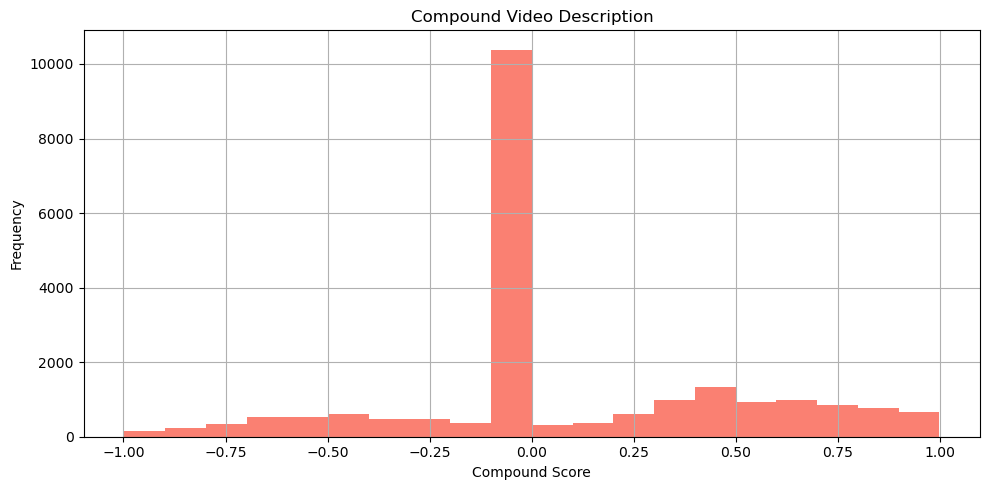

In [100]:
fig, ax = plt.subplots(figsize=(10, 5))

df_VADER['compound_video_description'].hist(ax=ax, bins=20, color='salmon')
ax.set_title('Compound Video Description')
ax.set_xlabel('Compound Score')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


THRESHOLD SET TO 0.5

In [35]:

#df_VADER['overall_sentiment_hashtag'] = df_VADER['compound_hashtag_names'].apply(
#    lambda x: 'Positive' if x > 0.5 else ('Negative' if x < -0.5 else 'Neutral')
#)

df_VADER['overall_sentiment_video_description'] = df_VADER['compound_video_description'].apply(
    lambda x: 'Positive' if x > 0.5 else ('Negative' if x < -0.5 else 'Neutral')
)


In [ ]:
#df_VADER['overall_sentiment_hashtag'].value_counts()

overall_sentiment_hashtag
Neutral     1571
Positive      85
Negative      34
Name: count, dtype: int64

In [36]:
df_VADER['overall_sentiment_video_description'].value_counts()

overall_sentiment_video_description
Neutral     15875
Positive     4164
Negative     1770
Name: count, dtype: int64

Let's show via histograms how the sentiment looks

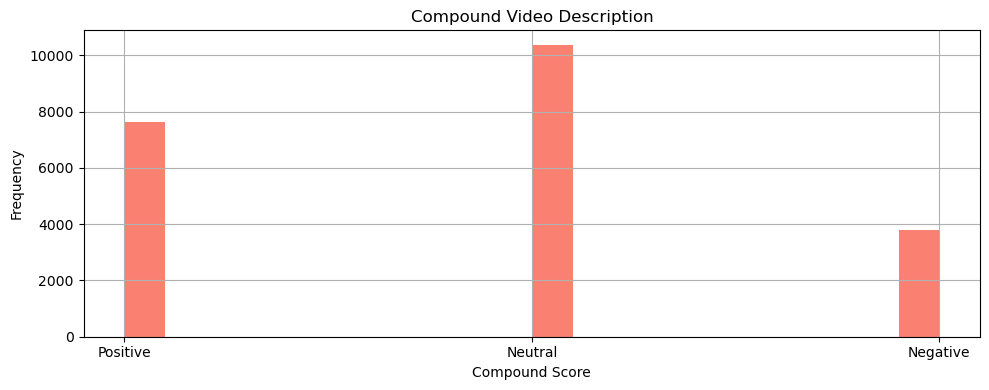

In [103]:



fig, ax = plt.subplots(figsize=(10, 4))  # 1 row, 2 columns

# Plot each histogram
#df_VADER['overall_sentiment_hashtag'].hist(ax=axes[0], bins=20, color='skyblue')
#axes[0].set_title('Compound Hashtag Names')
#axes[0].set_xlabel('Compound Score')
#axes[0].set_ylabel('Frequency')

df_VADER['overall_sentiment_video_description'].hist(ax=ax, bins=20, color='salmon')
ax.set_title('Compound Video Description')
ax.set_xlabel('Compound Score')
ax.set_ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [38]:
df_VADER['overall_sentiment_video_description'].value_counts()

overall_sentiment_video_description
Neutral     15875
Positive     4164
Negative     1770
Name: count, dtype: int64

In [39]:
grouped_counts = df_VADER.groupby(['overall_sentiment_video_description', 'affiliation']).size().reset_index(name='counts')

# Display the result
print(grouped_counts)

  overall_sentiment_video_description     affiliation  counts
0                            Negative         Neutral       1
1                            Negative    Pro-Democrat     941
2                            Negative  Pro-Republican     828
3                             Neutral         Neutral      57
4                             Neutral    Pro-Democrat    9201
5                             Neutral  Pro-Republican    6617
6                            Positive         Neutral      29
7                            Positive    Pro-Democrat    2099
8                            Positive  Pro-Republican    2036


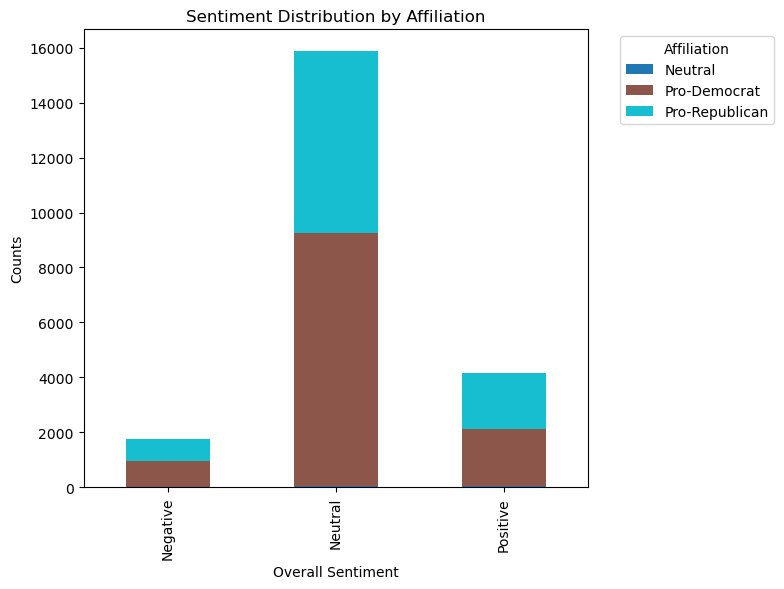

In [41]:
# Count occurrences of sentiment per affiliation
grouped_counts = df_VADER.groupby(['overall_sentiment_video_description', 'affiliation']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped_counts.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab10')

plt.title('Sentiment Distribution by Affiliation')
plt.xlabel('Overall Sentiment')
plt.ylabel('Counts')
plt.legend(title='Affiliation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [42]:

#pivot_table = df_VADER.pivot(index='overall_sentiment_video_description', columns='affiliation', values=grouped_counts)

#pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab10')

#plt.title('Sentiment Distribution by Affiliation')
#plt.xlabel('Overall Sentiment')
#plt.ylabel('Counts')
#plt.legend(title='Affiliation', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()

#plt.show()


# Maybe the threshhold ir to harsh? let's make it more lax, set it to 0.05

In [44]:
# Create the 'overall_sentiment' column using a direct lambda function
#df_VADER['overall_sentiment_hashtag'] = df_VADER['compound_hashtag_names'].apply(
#    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
#)

df_VADER['overall_sentiment_video_description'] = df_VADER['compound_video_description'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)


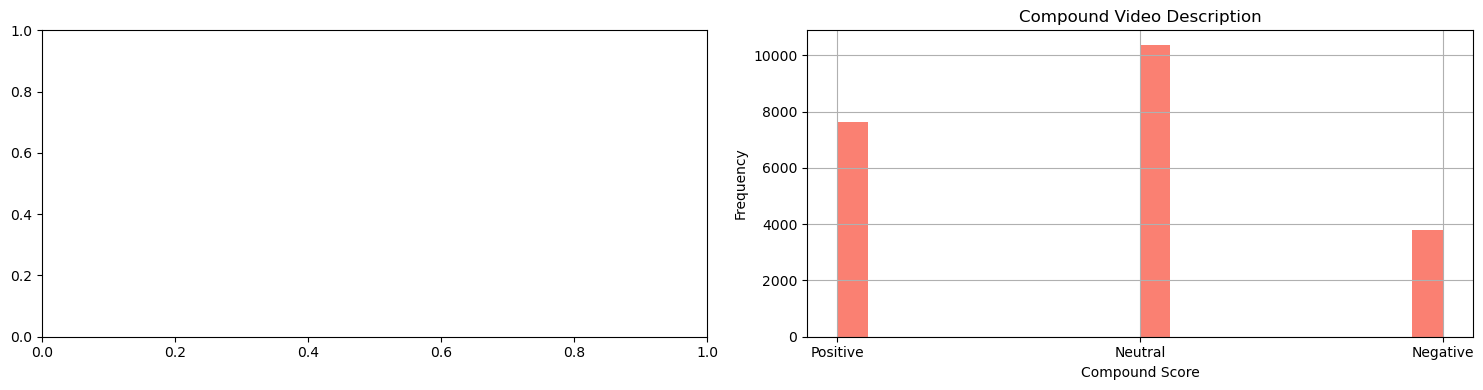

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))  # 1 row, 3 columns

# Plot each histogram
#df_VADER['overall_sentiment_hashtag'].hist(ax=axes[0], bins=20, color='skyblue')
#axes[0].set_title('Compound Hashtag Names')
#axes[0].set_xlabel('Compound Score')
#axes[0].set_ylabel('Frequency')

df_VADER['overall_sentiment_video_description'].hist(ax=axes[1], bins=20, color='salmon')
axes[1].set_title('Compound Video Description')
axes[1].set_xlabel('Compound Score')
axes[1].set_ylabel('Frequency')


# Adjust layout and show the plots
plt.tight_layout()
plt.show()

TF

We need to come back to df_stopwords, because doc2bow only works with lists, not pure strings like in df_VADER

In [46]:
#dictionary = corpora.Dictionary(df_stopwords['video_description'])
#corpus = [dictionary.doc2bow(text) for text in df_stopwords['video_description']]  #apply doc2bow


TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [47]:


#we need to tokenize BACK because TF_IDF can't deal with just a single string
df_stopwords['tokenized_video_description'] = df_stopwords['video_description'].apply(lambda x: simple_preprocess(str(x)))

dictionary = corpora.Dictionary(df_stopwords['tokenized_video_description'])

#now we can utilize doc2bow since we have tokens
corpus = [dictionary.doc2bow(text) for text in df_stopwords['tokenized_video_description']]


In [48]:
def TF(dictionary, corpus, which_text):
    bow = dict(corpus[which_text])  #bag of words for the given text

    #create a dictionary of token names and their counts
    bow_dict_combined = dict((dictionary[key], value) for (key, value) in bow.items())

    TFdictionary = {}
    bow_count = sum(bow_dict_combined.values())  #t number of tokens in the text

    for word, count in bow_dict_combined.items():
        TFdictionary[word] = count / bow_count  #calcualte term frequency

    return TFdictionary

In [49]:
TF(dictionary, corpus, 1) #Term Frequency in document no. 0

{'biden': 0.05263157894736842,
 'democrat': 0.05263157894736842,
 'bronx': 0.05263157894736842,
 'conviction': 0.05263157894736842,
 'dnc': 0.05263157894736842,
 'election': 0.05263157894736842,
 'fact': 0.05263157894736842,
 'fjb': 0.05263157894736842,
 'joebiden': 0.05263157894736842,
 'nyc': 0.05263157894736842,
 'reagan': 0.05263157894736842,
 'republican': 0.05263157894736842,
 'ronaldreagan': 0.05263157894736842,
 'trump': 0.10526315789473684,
 'truth': 0.05263157894736842,
 'voteblue': 0.05263157894736842,
 'votered': 0.05263157894736842,
 'washington': 0.05263157894736842}

In [50]:
d = {} # this dictionary will include all tokens names as keys and all TF values found for those tokens in a form of list

for i in range(0,len(corpus)): # for each text
    data = TF(dictionary, corpus, i) # calculates TF for all tokens in text

    for token, tf in data.items(): # for each token and calculated TF
        d.setdefault(token, []).append(tf) # fills dictionary named 'd'


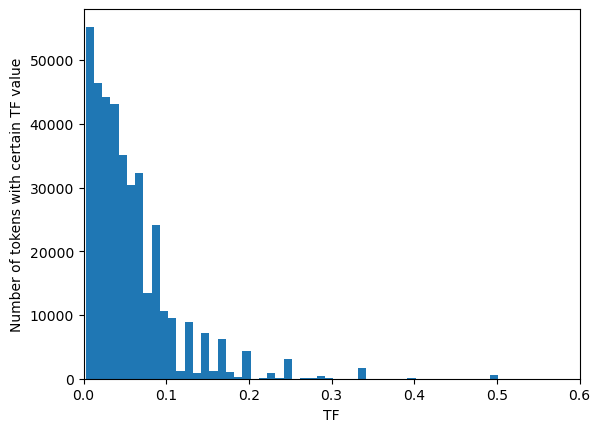

In [51]:
# dictionary 'd' looks like above, let us take TF values only - we will have list of lists
# the below makes list of lists a list
tf_values = [item for sublist in list(d.values()) for item in sublist]

#now, simple histogram
plt.hist(tf_values, bins=100)
plt.xlabel('TF')
plt.xlim([0, 0.6]) # limit on x axis
plt.ylabel('Number of tokens with certain TF value')
plt.show()

In [52]:
mean_tf = {}

for token, tfs in d.items(): # takes from dictionary 'd' all tokens' names with all TF values assigned to a name
                             # next, it saves tokens' names together with mean values of TF assigned tokens
    mean_tf[token] = statistics.mean(tfs)

In [53]:
mean_tf

{'biden': 0.11178931604107398,
 'deep': 0.04338870967024824,
 'democrat': 0.0647061720391491,
 'dive': 0.030829926920578045,
 'firsttiktok': 0.058823529411764705,
 'greenscreen': 0.07173016985977358,
 'handmaid': 0.05156136528685548,
 'liberal': 0.0629404145612565,
 'like': 0.05456972115904255,
 'look': 0.05112497184355171,
 'make': 0.054784328223045735,
 'momsoftiktok': 0.07127116857822476,
 'project': 0.06015077745767861,
 'ready': 0.05669726293899777,
 'tale': 0.04945752625491188,
 'utopia': 0.058823529411764705,
 'bronx': 0.053264845890411604,
 'conviction': 0.04574320614872466,
 'dnc': 0.07087104743533441,
 'election': 0.08921532079969502,
 'fact': 0.04953349034020827,
 'fjb': 0.0636245450425868,
 'joebiden': 0.04959890171377654,
 'nyc': 0.0432894466562329,
 'reagan': 0.05753318095341161,
 'republican': 0.0672909244338857,
 'ronaldreagan': 0.07421333032198134,
 'trump': 0.1218133706177409,
 'truth': 0.048120939596833764,
 'voteblue': 0.07670973333520897,
 'votered': 0.053430242031

In [54]:
def IDF(corpus, dictionary):
    occurence = {}

    for i in range(0,len(corpus)):

        #corpus from gensim library consists of so called bows
        #every bow = keys are tokens' indexes; values are numbers of tokens' occurences in text
        bow = dict(corpus[i])

        #dict_combined = keys are tokens' names; values are numbers of tokens' occurences in text
        bow_dict_combined = dict((dictionary[key], value) for (key, value) in bow.items())

        # creates a dictionary where keys are tokens' names and values are lists of tokens' non-zero counts in texts
        for token, count in bow_dict_combined.items():
            occurence.setdefault(token, []).append(count)

    IDFdictionary = {}

    # based on tokens' counts dictionary woth tokens' names and IDF values is computed
    for token, counts in occurence.items():
        IDFdictionary[token] = np.log(len(corpus)/len(counts))

    return(IDFdictionary)

In [55]:
IDFdictionary = IDF(corpus, dictionary)

In [56]:
IDFdictionary

{'biden': 1.4967951740021168,
 'deep': 6.812665908131054,
 'democrat': 1.5959201952768292,
 'dive': 6.812665908131054,
 'firsttiktok': 9.990719738479,
 'greenscreen': 3.655665486980941,
 'handmaid': 8.89210744981089,
 'liberal': 2.3739439297806273,
 'like': 3.4642248789082095,
 'look': 4.808936188186915,
 'make': 3.5339500829068364,
 'momsoftiktok': 5.416008759975617,
 'project': 3.650360434751248,
 'ready': 4.966839217632724,
 'tale': 7.79349516114278,
 'utopia': 9.990719738479,
 'bronx': 7.100347980582836,
 'conviction': 7.28266953737679,
 'dnc': 3.1248286635955616,
 'election': 1.0934476253450138,
 'fact': 4.363098624788363,
 'fjb': 3.8682269289646136,
 'joebiden': 2.7992904084426207,
 'nyc': 4.759611121624413,
 'reagan': 6.994987464925009,
 'republican': 1.5328520131475771,
 'ronaldreagan': 7.28266953737679,
 'trump': 0.6688379917699097,
 'truth': 4.222398742685228,
 'voteblue': 2.2108346234084775,
 'votered': 3.5642312810213093,
 'washington': 5.327280644366932,
 'cult': 3.8107030

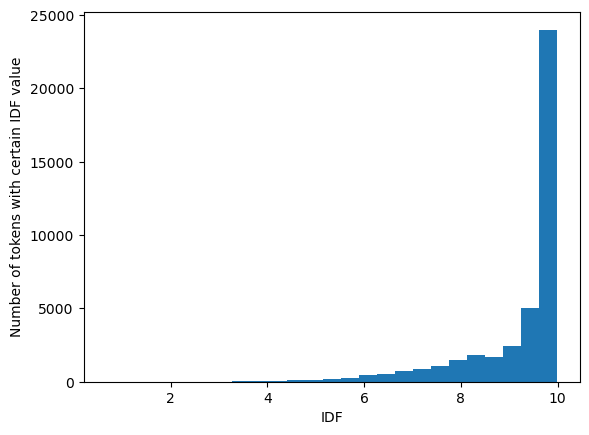

In [57]:
idf_values = list(IDFdictionary.values()) # takes values from IDF dictionary and makes it a list

# histogram of IDF values
# please note that it is an inversen measure!
# to remove least 'popular' terms we should remove the ones with highest IDF values
plt.hist(idf_values, bins=25)
plt.xlabel('IDF')
plt.ylabel('Number of tokens with certain IDF value')
plt.show()

In [58]:
#High IDF: If a word appears in only a few documents, its IDF value will be high,
#which means the word is relatively rare and potentially more
#significant in distinguishing those documents from others.

byIDF = sorted(IDFdictionary.items(), key=lambda x:x[1], reverse=True)
convertedbyIDF = dict(byIDF)
convertedbyIDF

{'firsttiktok': 9.990719738479,
 'utopia': 9.990719738479,
 'romano': 9.990719738479,
 'rittenhouse': 9.990719738479,
 'adorabletwins': 9.990719738479,
 'grin': 9.990719738479,
 'identicaltwins': 9.990719738479,
 'sisterlove': 9.990719738479,
 'twinsisters': 9.990719738479,
 'twinsoftiktok': 9.990719738479,
 'imhere': 9.990719738479,
 'privatecitizen': 9.990719738479,
 'theanswer': 9.990719738479,
 'thelaptop': 9.990719738479,
 'whereishunter': 9.990719738479,
 'goated': 9.990719738479,
 'goldenshowers': 9.990719738479,
 'rtpmedia': 9.990719738479,
 'beatty': 9.990719738479,
 'royalauthority': 9.990719738479,
 'shooterdead': 9.990719738479,
 'prodigalsun': 9.990719738479,
 'embracereality': 9.990719738479,
 'pleaseunitenow': 9.990719738479,
 'silzey': 9.990719738479,
 'silzeylive': 9.990719738479,
 'americanidol': 9.990719738479,
 'broadcasted': 9.990719738479,
 'jesusislove': 9.990719738479,
 'praisejesus': 9.990719738479,
 'trumpresistance': 9.990719738479,
 'criminality': 9.99071973

In [59]:
tfidf_model = models.TfidfModel(corpus, id2word = dictionary)

In [60]:
def TFIDF(dictionary, corpus, which_text, tfidf_model):
    bow = corpus[which_text]
    tfidfdictionary = dict(tfidf_model[bow]) #TFIDF for tokens in a chosen text

    #below: keys are tokens' names; values are numbers of tokens' occurences in text
    TFIDFdictionary = dict((dictionary[key], value) for (key, value) in tfidfdictionary.items())

    return(TFIDFdictionary)

In [61]:
TFIDF(dictionary, corpus, 0, tfidf_model)

{'biden': 0.1245478383987846,
 'deep': 0.28343985447323994,
 'democrat': 0.06639799954967457,
 'dive': 0.28343985447323994,
 'firsttiktok': 0.4156622659827838,
 'greenscreen': 0.1520933666211408,
 'handmaid': 0.3699546808139659,
 'liberal': 0.09876755018642086,
 'like': 0.14412851133187132,
 'look': 0.20007500613291127,
 'make': 0.14702941707728598,
 'momsoftiktok': 0.2253321615142016,
 'project': 0.15187265078798032,
 'ready': 0.2066445359308699,
 'tale': 0.32424709564514803,
 'utopia': 0.4156622659827838}

In [62]:
d_tfidf = {}

for i in range(0,len(corpus)): # for each text
    data = TFIDF(dictionary, corpus, i, tfidf_model) # calculate TFIDF values for text's tokens

    for token, value in data.items(): # next, for each token and its TFIDF value in text, prepare a dictionary
                                      # with tokens' names as keys and list of TF-IDFs as values
        d_tfidf.setdefault(token, []).append(value)

In [63]:
d_tfidf

{'biden': [0.1245478383987846,
  0.07959923006993314,
  0.16362185515133126,
  0.0683461503584052,
  0.036567204315875214,
  0.1305002996179872,
  0.13868023049896888,
  0.16666273930135136,
  0.06586145377635153,
  0.05090603127754339,
  0.09465874360965759,
  0.09645753303158552,
  0.05798301261505746,
  0.24170067266273992,
  0.18346230257553575,
  0.08988609440110541,
  0.06579737276025739,
  0.10897274376390075,
  0.13772181868703634,
  1.0,
  0.14212999593694356,
  0.0586091742710813,
  0.2331710441012471,
  0.10079870076181821,
  0.07721143113927552,
  0.03975276143537194,
  0.0980168086927215,
  0.14434468506586562,
  0.14473943404085685,
  0.1669531803405063,
  0.023448244571071544,
  0.29696446968314794,
  0.15588306334294538,
  0.09983531836518604,
  0.13162268208126757,
  0.08511096526268846,
  0.0802895897982279,
  0.21587867138616149,
  0.3554270376115733,
  0.08711313845930177,
  0.15927117012414055,
  0.11146820767229605,
  0.09642251450464603,
  0.05230307853433759,
  

**High TF-IDF: Words that have both high frequency in the document (high TF) and are rare across documents (high IDF) will have the highest TF-IDF scores. These are often the most important words for classifying or understanding a document.**


**Low TF-IDF: Words that are common across documents (low IDF) or appear rarely in the document (low TF) will have lower TF-IDF scores.**

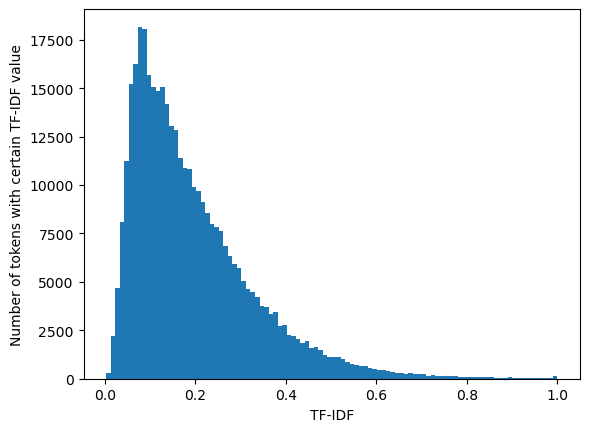

In [64]:
tfidf_values = [item for sublist in list(d_tfidf.values()) for item in sublist]

plt.hist(tfidf_values, bins=100)
plt.xlabel('TF-IDF')
plt.ylabel('Number of tokens with certain TF-IDF value')
plt.show()

In [65]:
mean_tfidf = {}

for token, tfidfs in d_tfidf.items():
    mean_tfidf[token] = statistics.mean(tfidfs)


mean_tfidf

{'biden': 0.14465624845407932,
 'deep': 0.2079937232151627,
 'democrat': 0.10587030809344022,
 'dive': 0.17336335611028808,
 'firsttiktok': 0.4156622659827838,
 'greenscreen': 0.18974445849444813,
 'handmaid': 0.31696548467176483,
 'liberal': 0.13219216620221305,
 'like': 0.14010097223534634,
 'look': 0.18345404758577558,
 'make': 0.15743209710067457,
 'momsoftiktok': 0.2277594337442664,
 'project': 0.18317885450857016,
 'ready': 0.2142741491793803,
 'tale': 0.31056597977688194,
 'utopia': 0.4156622659827838,
 'bronx': 0.29258889456402815,
 'conviction': 0.26285359220498955,
 'dnc': 0.2549356315929648,
 'election': 0.08108400941570561,
 'fact': 0.1728371275619216,
 'fjb': 0.21964007310043024,
 'joebiden': 0.12998619241420079,
 'nyc': 0.16185738123308463,
 'reagan': 0.2741757241855498,
 'republican': 0.09547707411392144,
 'ronaldreagan': 0.33699094101079036,
 'trump': 0.06876237108842992,
 'truth': 0.16904901472719372,
 'voteblue': 0.13640990247611204,
 'votered': 0.17500836773365344,
 

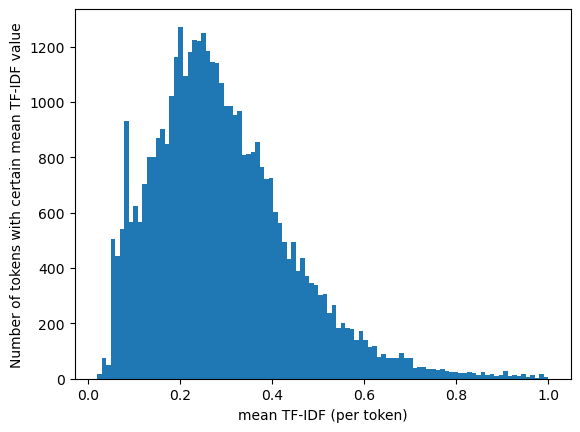

In [66]:
mean_tfidf_values = list(mean_tfidf.values())

plt.hist(mean_tfidf_values, bins=100)
plt.xlabel('mean TF-IDF (per token)')
plt.ylabel('Number of tokens with certain mean TF-IDF value')
plt.show()

In [67]:
Counter(tfidf_values)

Counter({0.05516777159237632: 245,
         0.15946246095698646: 240,
         0.08705235668640188: 176,
         0.35821093127236914: 152,
         0.19096669648458048: 152,
         0.373914816500997: 152,
         0.13084117953330734: 152,
         0.18689834035395508: 152,
         0.5286764064271494: 152,
         0.29203862509759754: 152,
         0.28644346435304296: 152,
         0.44330440572010016: 152,
         1.0: 149,
         0.06288258788403285: 136,
         0.0548759931996647: 127,
         0.31964526598122994: 116,
         0.17040686132762645: 116,
         0.3336584412715918: 116,
         0.11675457106980788: 116,
         0.16677651210053565: 116,
         0.47175810618106084: 116,
         0.521194390492431: 116,
         0.2556044200730843: 116,
         0.39557741628300397: 116,
         0.09391403338741172: 90,
         0.07846984603204948: 88,
         0.2098855437467641: 88,
         0.08308716894181288: 86,
         0.08756787654270058: 83,
         0.0850

In [68]:
tfidf_corpus = tfidf_model[corpus]

In [69]:
doc_tfidf = tfidf_corpus[0]

# doc_tfidf is a list of (token_id, tf-idf_score) pairs
for token_id, tfidf_score in doc_tfidf:
    print(f"Token: {dictionary[token_id]}, TF-IDF: {tfidf_score}")

Token: biden, TF-IDF: 0.1245478383987846
Token: deep, TF-IDF: 0.28343985447323994
Token: democrat, TF-IDF: 0.06639799954967457
Token: dive, TF-IDF: 0.28343985447323994
Token: firsttiktok, TF-IDF: 0.4156622659827838
Token: greenscreen, TF-IDF: 0.1520933666211408
Token: handmaid, TF-IDF: 0.3699546808139659
Token: liberal, TF-IDF: 0.09876755018642086
Token: like, TF-IDF: 0.14412851133187132
Token: look, TF-IDF: 0.20007500613291127
Token: make, TF-IDF: 0.14702941707728598
Token: momsoftiktok, TF-IDF: 0.2253321615142016
Token: project, TF-IDF: 0.15187265078798032
Token: ready, TF-IDF: 0.2066445359308699
Token: tale, TF-IDF: 0.32424709564514803
Token: utopia, TF-IDF: 0.4156622659827838


In [70]:
doc_tfidf = tfidf_corpus[0]

# doc_tfidf is a list of (token_id, tf-idf_score) pairs
for token_id, tfidf_score in doc_tfidf:
    print(f"Token: {dictionary[token_id]}, TF-IDF: {tfidf_score}")

Token: biden, TF-IDF: 0.1245478383987846
Token: deep, TF-IDF: 0.28343985447323994
Token: democrat, TF-IDF: 0.06639799954967457
Token: dive, TF-IDF: 0.28343985447323994
Token: firsttiktok, TF-IDF: 0.4156622659827838
Token: greenscreen, TF-IDF: 0.1520933666211408
Token: handmaid, TF-IDF: 0.3699546808139659
Token: liberal, TF-IDF: 0.09876755018642086
Token: like, TF-IDF: 0.14412851133187132
Token: look, TF-IDF: 0.20007500613291127
Token: make, TF-IDF: 0.14702941707728598
Token: momsoftiktok, TF-IDF: 0.2253321615142016
Token: project, TF-IDF: 0.15187265078798032
Token: ready, TF-IDF: 0.2066445359308699
Token: tale, TF-IDF: 0.32424709564514803
Token: utopia, TF-IDF: 0.4156622659827838


In [71]:
dense_tfidf_matrix = []
for doc in tfidf_corpus:
    dense_tfidf = [0] * len(dictionary)  # Initialize a list of zeros for all terms
    for token_id, tfidf_score in doc:
        dense_tfidf[token_id] = tfidf_score  # Populate the scores for the tokens in the document
    dense_tfidf_matrix.append(dense_tfidf)

In [72]:
type(dense_tfidf_matrix)

list

In [96]:
df_tfidf = pd.DataFrame(dense_tfidf_matrix, columns=[dictionary[token_id] for token_id in range(len(dictionary))])

MemoryError: Unable to allocate 170. KiB for an array with shape (21823,) and data type uint64

In [95]:
df_tfidf.shape

AttributeError: 'function' object has no attribute 'shape'

In [81]:
df_VADER.head(2)

Unnamed: 0                   id  create_time       username region_code  \
0           0  7374061089564183854   1716907397      amy197963          us   
1           1  7376378807764258094   1717447031  christophnooz          us   

                                   video_description  like_count  \
0  ready deep dive Project make handmaid tale loo...   82.000000   
1  democrat reagan ronaldreagan republican dnc tr...  215.000000   

   comment_count  share_count  view_count  \
0              0            2        1061   
1             12          144        2055   

                                       hashtag_names  duration_type  \
0  greenscreen momsoftiktok biden2024 liberal fir...              2   
1  truth washington ronaldreagan biden2024 nyc vo...              2   

   favorites_count  topic     affiliation  \
0                0     -1  Pro-Republican   
1                0      0    Pro-Democrat   

                                    sentiment_scores  \
0  {'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp...   
1  {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...   

   compound_video_description overall_sentiment_video_description  
0                    0.612400                            Positive  
1                    0.318200                            Positive

In [82]:
df_VADER.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21809 entries, 0 to 21822
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           21809 non-null  int64  
 1   id                                   21809 non-null  int64  
 2   create_time                          21809 non-null  int64  
 3   username                             21809 non-null  object 
 4   region_code                          21809 non-null  object 
 5   video_description                    21809 non-null  object 
 6   like_count                           21809 non-null  float64
 7   comment_count                        21809 non-null  int64  
 8   share_count                          21809 non-null  int64  
 9   view_count                           21809 non-null  int64  
 10  hashtag_names                        21746 non-null  object 
 11  duration_type                    

In [84]:
df_VADER.columns

Index(['Unnamed: 0', 'id', 'create_time', 'username', 'region_code',
       'video_description', 'like_count', 'comment_count', 'share_count',
       'view_count', 'hashtag_names', 'duration_type', 'favorites_count',
       'topic', 'affiliation', 'sentiment_scores',
       'compound_video_description', 'overall_sentiment_video_description'],
      dtype='object')

In [85]:
df_VADER['duration_type'].value_counts()

duration_type
2    6323
3    5571
1    5227
0    4194
4     494
Name: count, dtype: int64

In [86]:
df_VADER.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21809 entries, 0 to 21822
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           21809 non-null  int64  
 1   id                                   21809 non-null  int64  
 2   create_time                          21809 non-null  int64  
 3   username                             21809 non-null  object 
 4   region_code                          21809 non-null  object 
 5   video_description                    21809 non-null  object 
 6   like_count                           21809 non-null  float64
 7   comment_count                        21809 non-null  int64  
 8   share_count                          21809 non-null  int64  
 9   view_count                           21809 non-null  int64  
 10  hashtag_names                        21746 non-null  object 
 11  duration_type                    

In [87]:
print(df_VADER.shape)
print(df_tfidf.shape)

(21809, 18)
(21823, 40888)


In [91]:
#ok we need same number of rows, lets drop NAN values for tf_idf (14, same as for df_VADER so these must have gone unnoticed)
df_tfidf = df_tfidf.dropna()


In [ ]:
#thanks i was Beginning to lose it
df_VADER = df_VADER.reset_index(drop=True)
df_tfidf = df_tfidf.reset_index(drop=True)

In [94]:
print(type(df_VADER))
print(type(df_tfidf))

<class 'pandas.core.frame.DataFrame'>
<class 'method'>


In [93]:
df_combined = pd.concat([df_VADER, df_tfidf], axis=1)

TypeError: cannot concatenate object of type '<class 'method'>'; only Series and DataFrame objs are valid

In [ ]:
df_combined.shape

(4527, 22826)

In [ ]:
df_combined = df_combined.drop(['video_description', 'username', 'region_code','sentiment_scores','hashtag_names'], axis=1)


In [ ]:

label_encoder = LabelEncoder()

# Fit and transform the party_affiliation column
df_combined['party_affiliation'] = label_encoder.fit_transform(df_combined['party_affiliation'])

# Now you can access the mapping using label_encoder.classes_
print(f"Classes: {label_encoder.classes_}")

Classes: ['Democrat' 'Neutral' 'Republican']


# 0 =democrat
# 1 = Neutral
# 2 =Republican

In [ ]:
df_combined['party_affiliation'].value_counts()

party_affiliation
1    3138
2     743
0     646
Name: count, dtype: int64

In [ ]:
df_combined = pd.get_dummies(df_combined, columns=['overall_sentiment_video_description'])
#df_combined = pd.get_dummies(df_combined, columns=['overall_sentiment_hashtag', 'overall_sentiment_video_description'])

# ML


we choose logistic regression and SVM to classify party affiliation (neutral, pro republican, pro democrat)

In [104]:
#SCALE numerical values
scaler = StandardScaler()
columns_to_scale = ['like_count', 'comment_count', 'view_count', 'favorites_count']
df_combined[columns_to_scale] = scaler.fit_transform(df_combined[columns_to_scale])

NameError: name 'StandardScaler' is not defined

In [ ]:

#set target variable (party affiliation)
X = df_combined.drop('party_affiliation', axis=1)  #since its a target variable, drop the column 'party_affiliation' from features
y = df_combined['party_affiliation']  #keep the 'party_affiliation' in the test set as the target variable


#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION

In [ ]:
#train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)  #probabilities for each class

#evaluation using metrics for logistic regression
#weighted because its a multi class classification, not binary (0 1 or 2)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted') 
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  #one-vs-Rest 

# evaluation metrics for logistic reg
print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print(f"ROC AUC (One-vs-Rest): {roc_auc}")

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7240618101545254

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.72      1.00      0.84       656
           2       0.00      0.00      0.00       132

    accuracy                           0.72       906
   macro avg       0.24      0.33      0.28       906
weighted avg       0.52      0.72      0.61       906


Confusion Matrix:
 [[  0 118   0]
 [  0 656   0]
 [  0 132   0]]


C:\Users\Piotr\miniconda3\envs\Piotrus\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Piotr\miniconda3\envs\Piotrus\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Piotr\miniconda3\envs\Piotrus\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

# SVM

In [ ]:
#train SVM
svm_model = SVC(kernel='linear', C=1.0) 
svm_model.fit(X_train, y_train)

#predict
y_pred = svm_model.predict(X_test)


#evaliate SVM
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted') 
roc_auc = roc_auc_score(y_test, svm_model.decision_function(X_test), multi_class='ovr', average='weighted')

#lets see the how good SVM did
print(f"SVM Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")


